In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()




Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
import numpy as np

# LOAD DATA

In [5]:
data_dir = 'data'

In [6]:
import os  #navigate through file structure
os.listdir(data_dir)

['Fire_Types', 'Grass_Types', 'Water_Types']

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 32
img_height = 128  # Adjust according to your image size
img_width = 128
num_classes = 3  # Number of classes (folders)

# Create an ImageDataGenerator with optional data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # You can use this for a validation split
)

# Create training dataset
train_dataset = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' if your labels are one-hot encoded
    subset='training'  # Use 'training' to get the training split
)

# Create validation dataset (optional)
test_dataset = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' if your labels are one-hot encoded
    subset='validation'  # Use 'validation' to get the validation split
)



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


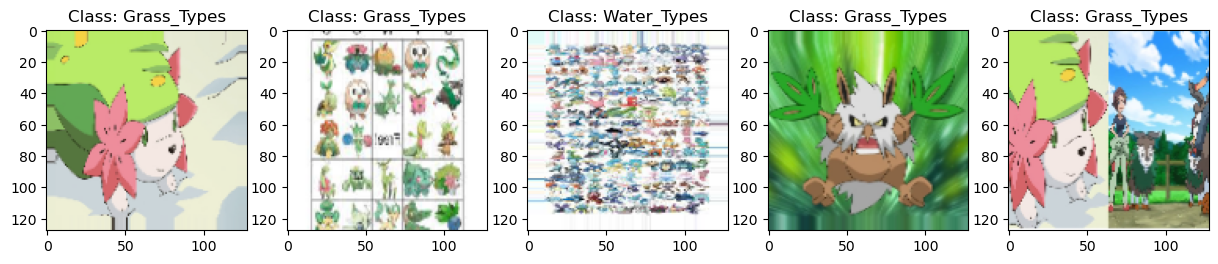

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Extract class labels from the training dataset
class_indices = train_dataset.class_indices
class_labels = list(class_indices.keys())

# Display a few images from the training dataset
num_images_to_display = 5

# Extract a batch of images and labels from the training dataset
images, labels = train_dataset.next()

# Display the images along with their labels
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    # Convert the image to RGBA if it has a palette and transparency
    pil_image = Image.fromarray((images[i] * 255).astype('uint8'))  # Convert to PIL Image
    if pil_image.mode == 'P' and 'transparency' in pil_image.info:
        pil_image = pil_image.convert('RGBA')
        images[i] = (np.array(pil_image) / 255.0)[:, :, :3]  # Convert back to NumPy array without alpha channel

    axes[i].imshow(images[i])
    axes[i].set_title(f"Class: {class_labels[labels[i].argmax()]}")  # Assuming one-hot encoded labels

plt.show()

# Reshaping

In [35]:
# Assuming train_dataset is a DirectoryIterator
batch1 = next(train_dataset)
batch_shape1 = batch1[0].shape  # Assuming images are in the first element of the batch tuple

batch2 = next(test_dataset)
batch_shape2 = batch2[0].shape  # Assuming images are in the first element of the batch tuple

print("Shape of a batch in train_dataset:", batch_shape1)
print("Shape of a batch in test_dataset:", batch_shape2)

Shape of a batch in train_dataset: (32, 128, 128, 3)
Shape of a batch in test_dataset: (32, 128, 128, 3)


In [37]:
second_element = batch1[1]
print(second_element)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Modelling

In [40]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Use 'softmax' for multi-class classification
])

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Assuming train_dataset is a DirectoryIterator
model.fit(train_dataset, epochs=5, steps_per_epoch=train_dataset.samples // 64)

Epoch 1/5
3/3 [==============================] - 1s 399ms/step - batch: 1.0000 - size: 32.0000 - loss: 0.1069 - acc: 0.9792
Epoch 2/5
3/3 [==============================] - 1s 502ms/step - batch: 1.0000 - size: 26.6667 - loss: 0.1445 - acc: 0.9333
Epoch 3/5
3/3 [==============================] - 1s 397ms/step - batch: 1.0000 - size: 32.0000 - loss: 0.1779 - acc: 0.9444
Epoch 4/5
3/3 [==============================] - 1s 530ms/step - batch: 1.0000 - size: 32.0000 - loss: 0.1117 - acc: 0.9722
Epoch 5/5
3/3 [==============================] - 1s 255ms/step - batch: 1.0000 - size: 26.6667 - loss: 0.1458 - acc: 0.9458


In [53]:
# Assuming train_dataset and test_dataset are DirectoryIterators
train_results = model.evaluate(train_dataset)
test_results = model.evaluate(test_dataset)

train_loss, train_accuracy = train_results[0], train_results[1]
test_loss, test_accuracy = test_results[0], test_results[1]

print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')
print(f'Testing Loss: {test_loss}, Testing Accuracy: {test_accuracy}')


Training Loss: 0.09800929855555296, Training Accuracy: 0.973611056804657
Testing Loss: 0.1468818634748459, Testing Accuracy: 0.9277777075767517


# Single image Predictor

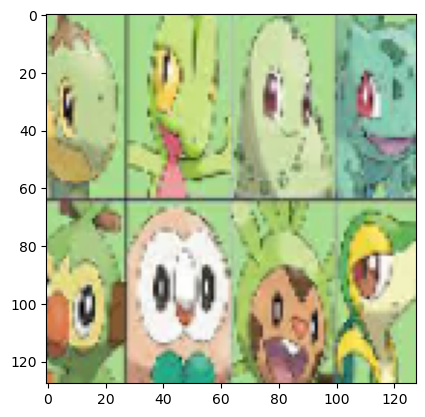

This Pokemon is a Grass Type


In [62]:
import random

batch = next(train_dataset)
random_index = random.randint(0, len(batch[0]) - 1)

# Display a random image from the training batch
plt.imshow(batch[0][random_index])
plt.show()

# Make a prediction on the displayed image
predicted_probs = model.predict(batch[0][random_index].reshape(1, 128, 128, 3))
#print(predicted_probs)

predicted_class = predicted_probs.argmax()

if predicted_class == 0:
    predicted_class = 'Fire Type'
elif predicted_class == 1:
    predicted_class = 'Grass Type'
else:
    predicted_class = 'Water Type'

print("This Pokemon is a", predicted_class)